**Name-Siddhika Rakshe**

**class- BE CSE IS2**

**Roll no-2173199**


# AIM:


Develop RNN model for Cryptocurrency Pricing Prediction or text sentiment analysis.


#   OBJECTIVES:

        1. To learnRNN
        2. To learn and implementLSTM
        

#Theory

**What is Recurrent Neural Network (RNN)?**

Recurrent Neural Network is a generalization of feedforward neural network that has an internal memory. RNN is recurrent in nature as it performs the same function for every input of data while the output of the current input depends on the past one computation. After producing the output, it is copied and sent back into the recurrent network. For making a decision, it considers the current input and the output that it has learned from the previous input.


Unlike feedforward neural networks, RNNs can use their internal state (memory) to process sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition. In other neural networks, all the inputs are independent of each other. But in RNN, all the inputs are related to each other.


Advantages of Recurrent Neural Network-

RNN can model sequence of data so that each sample can be assumed to be dependent on previous ones
Recurrent neural network are even used with convolutional layers to extend the effective pixel neighbourhood.



Disadvantages of Recurrent Neural Network-

Gradient vanishing and exploding problems.
Training an RNN is a very difficult task.
It cannot process very long sequences if using tanh or relu as an activation function.



**What is Long Short Term Memory (LSTM)?**


Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory. The vanishing gradient problem of RNN is resolved here. LSTM is well-suited to classify, process and predict time series given time lags of unknown duration.


Input gate — discover which value from input should be used to modify the memory. Sigmoid function decides which values to let through 0,1. and tanh function gives weightage to the values which are passed deciding their level of importance ranging from-1 to 1.

Forget gate — discover what details to be discarded from the block. It is decided by the sigmoid function. it looks at the previous state(ht-1) and the content input(Xt) and outputs a number between 0(omit this)and 1(keep this)for each number in the cell state Ct−1.


Output gate — the input and the memory of the block is used to decide the output. Sigmoid function decides which values to let through 0,1. and tanh function gives weightage to the values which are passed deciding their level of importance ranging from-1 to 1 and multiplied with output of Sigmoid.


DATASET USED AND ITS ATTRIBUTES:



The Bitcoin USD (BTC-USD) dataset has been used for the implementation of RNN. Cryptocurrencypricingpredictionisdoneonthisdataset.Thedatasetconsistsofdatafrom the year 2014-2020. It has various attributes such as:

    • Date
    • Open
    • High
    • Low
    • Close
    • AdjClose
    • Volume

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [ ]:
df = pd.read_csv("BTC-USD.csv", parse_dates=['Date'])

In [ ]:
df = df.sort_values('Date')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df.shape

(2267, 7)

Text(0, 0.5, 'Close Price (USD)')

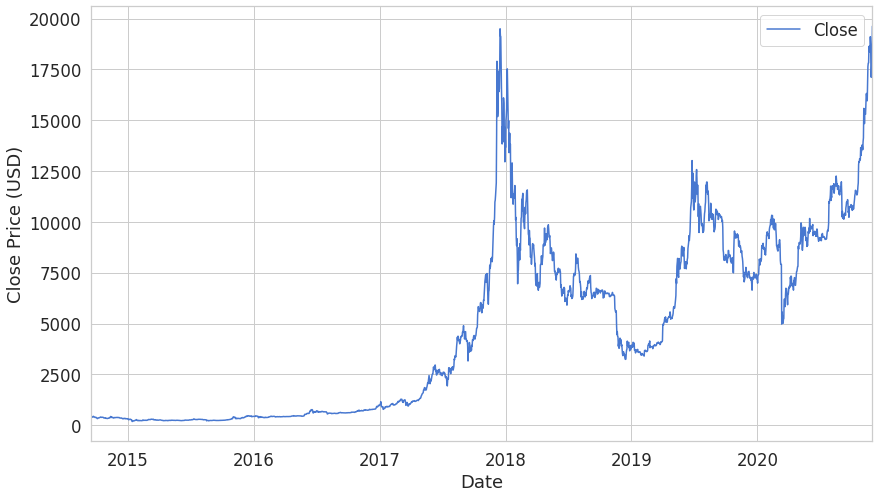

In [ ]:
ax = df.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

In [ ]:
scaler = MinMaxScaler()
close_price = df.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [ ]:
scaled_close.shape

(2267, 1)

In [ ]:
np.isnan(scaled_close).any()

False

In [ ]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.85)

In [ ]:
X_train.shape

(1841, 99, 1)

In [ ]:
X_test.shape

(326, 99, 1)

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

model = keras.Sequential()
model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=False)))
model.add(Dense(units=1))
model.add(Activation('linear'))

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
BATCH_SIZE = 32

history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
52/52 [==============================] - 12s 237ms/step - loss: 0.0099 - accuracy: 6.0386e-04 - val_loss: 0.0429 - val_accuracy: 0.0000e+00
Epoch 2/50
52/52 [==============================] - 2s 35ms/step - loss: 0.0129 - accuracy: 6.0386e-04 - val_loss: 0.0141 - val_accuracy: 0.0000e+00
Epoch 3/50
52/52 [==============================] - 2s 33ms/step - loss: 0.0098 - accuracy: 6.0386e-04 - val_loss: 0.0250 - val_accuracy: 0.0000e+00
Epoch 4/50
52/52 [==============================] - 2s 33ms/step - loss: 0.0096 - accuracy: 6.0386e-04 - val_loss: 0.0243 - val_accuracy: 0.0000e+00
Epoch 5/50
52/52 [==============================] - 2s 33ms/step - loss: 0.0027 - accuracy: 6.0386e-04 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 6/50
52/52 [==============================] - 2s 33ms/step - loss: 0.0012 - accuracy: 6.0386e-04 - val_loss: 9.6125e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
52/52 [==============================] - 2s 33ms/step - loss: 6.7202e-04 - accuracy: 6.03

In [ ]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 9s 861ms/step - loss: 0.0030 - accuracy: 0.0000e+00


[0.0029882616363465786, 0.0]

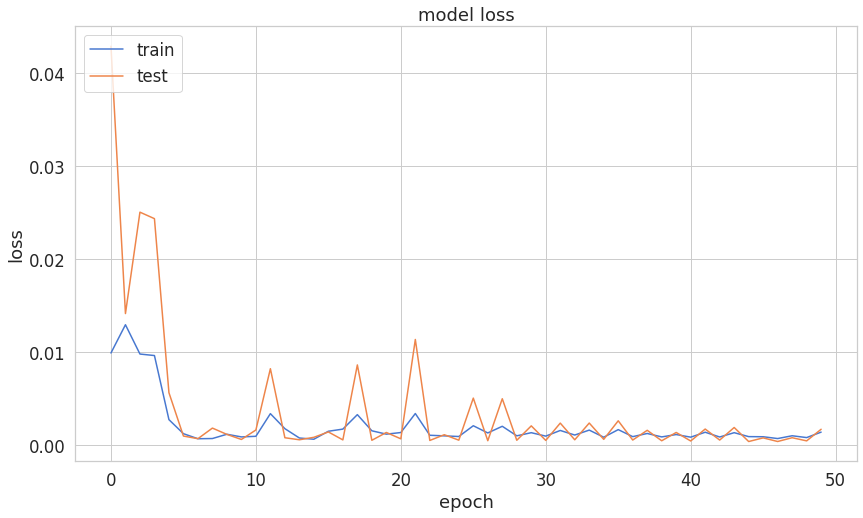

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

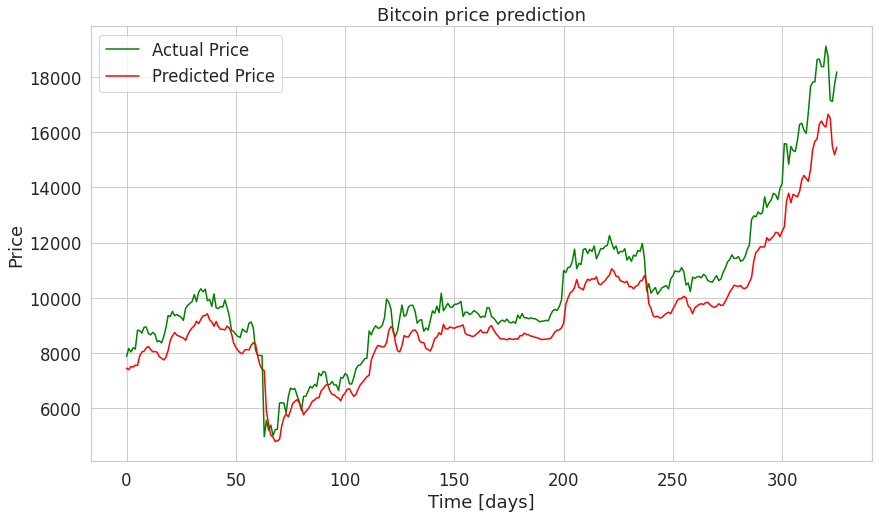

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show()